# Loading Data

## Minibatch Gradient Descent
+ 엄청난 양의 데이터를 한번에 학습시킬 수 없음
    + 너무 느림
    + 하드웨어가 감당할 수 없음
+ 일부분의 데이터로 학습하는 방법

## PyTorch Dataset

In [1]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
dataset = CustomDataset()

In [2]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2, # usaully set powered 2 
    shuffle=True  # prevent to memorize sequence of data
)

## Train a model with Dataset and DataLoader

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [5]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [6]:
nb_epochs = 20
costs = []
for epoch in range(nb_epochs + 1):
    for batch_idx, sample in enumerate(dataloader):
        x_train, y_train = sample
        prediction = model(x_train)
        
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print("Epoch {:4d}/{} Batch {}/{} Cost {:.6f}".format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()))
        
        costs.append(cost.item())
        # item() is used to return scalar value if tensor has one value 

Epoch    0/20 Batch 1/3 Cost 49558.144531
Epoch    0/20 Batch 2/3 Cost 20046.150391
Epoch    0/20 Batch 3/3 Cost 8655.345703
Epoch    1/20 Batch 1/3 Cost 1308.824707
Epoch    1/20 Batch 2/3 Cost 410.766144
Epoch    1/20 Batch 3/3 Cost 119.874031
Epoch    2/20 Batch 1/3 Cost 56.005630
Epoch    2/20 Batch 2/3 Cost 16.775938
Epoch    2/20 Batch 3/3 Cost 0.466925
Epoch    3/20 Batch 1/3 Cost 6.616332
Epoch    3/20 Batch 2/3 Cost 1.619426
Epoch    3/20 Batch 3/3 Cost 17.732380
Epoch    4/20 Batch 1/3 Cost 3.666771
Epoch    4/20 Batch 2/3 Cost 3.730549
Epoch    4/20 Batch 3/3 Cost 14.214428
Epoch    5/20 Batch 1/3 Cost 2.766657
Epoch    5/20 Batch 2/3 Cost 5.896827
Epoch    5/20 Batch 3/3 Cost 13.715961
Epoch    6/20 Batch 1/3 Cost 2.810760
Epoch    6/20 Batch 2/3 Cost 6.694264
Epoch    6/20 Batch 3/3 Cost 6.680919
Epoch    7/20 Batch 1/3 Cost 8.062403
Epoch    7/20 Batch 2/3 Cost 1.766792
Epoch    7/20 Batch 3/3 Cost 8.541010
Epoch    8/20 Batch 1/3 Cost 5.609428
Epoch    8/20 Batch 2/3 Cos

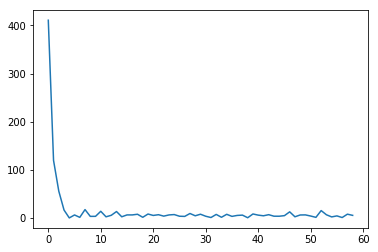

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(costs[4:])